# Decision Tree
* A decision tree is a supervised machine learning algorithm that is widely used for both classification and regression tasks.
* It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.
* In a Decision tree, there are two nodes, which are the Decision Node and Leaf Node. Decision nodes are used to make any decision and have multiple branches, whereas Leaf nodes are the output of those decisions and do not contain any further branches.
* Main disdavantage of decision tree is overfitting.

### Importing libraries............

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_csv("E:\Courses\Data science(ETLHive)\dataset\heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Splitting Data........

In [4]:
x=df.drop("target",axis=1)
y=df['target']

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75)

In [6]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(x_test.shape)

(227, 13)
(76, 13)
(227,)
(76, 13)


Desicion tree is not a distance based algorithm. So it doesn't require feature scaling.

In [7]:
dtc=DecisionTreeClassifier(criterion='gini',
                           max_depth=None,
                           min_samples_split=2,
                           min_samples_leaf=1,
                           max_features=None) # taking all default parameter values.
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [8]:
y_pred=dtc.predict(x_test)

In [9]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.51      0.64      0.57        28
           1       0.76      0.65      0.70        48

    accuracy                           0.64        76
   macro avg       0.64      0.64      0.63        76
weighted avg       0.67      0.64      0.65        76



<AxesSubplot:>

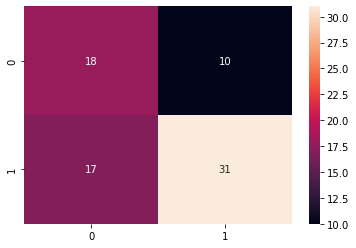

In [10]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

### Hyperparameter Tuning 

In [11]:
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# criterion
criteria = [ 'gini','entropy']

In [12]:
# Create the param grid
param_grid = {
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion':criteria}

print(param_grid)

{'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'criterion': ['gini', 'entropy']}


In [13]:
gs_cv=GridSearchCV(dtc,param_grid=param_grid,cv = 3, verbose=2, n_jobs = 4)

In [14]:
gs_cv.fit(x_train,y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=4,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5]},
             verbose=2)

In [15]:
gs_cv.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [16]:
depth=gs_cv.best_params_['max_depth']
features=gs_cv.best_params_['max_features']
leaf=gs_cv.best_params_['min_samples_leaf']
split=gs_cv.best_params_['min_samples_split']
criteria=gs_cv.best_params_['criterion']

In [17]:
dtc=DecisionTreeClassifier(max_depth= depth,
                           max_features= features,
                           min_samples_leaf= leaf,
                           min_samples_split= split,
                           criterion=criteria
                          )


dtc.fit(x_train,y_train)
y_pred=dtc.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.68      0.69        28
           1       0.82      0.83      0.82        48

    accuracy                           0.78        76
   macro avg       0.76      0.76      0.76        76
weighted avg       0.77      0.78      0.78        76



<AxesSubplot:>

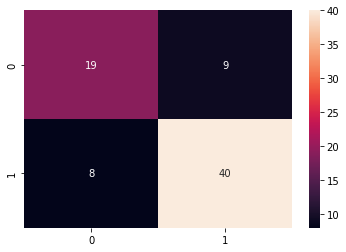

In [18]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)